## **Practical Lab 1 - Univariate Linear Regression**

### Predicting Housing pricing in California

**Name:** Mandeep Singh Brar  
**Student ID:** 8989367  
**Course Name:** Foundations of Machine Learning Frameworks  
**Course Code:** CSCN8010  

- **GitHub Repository:** https://github.com/MandeepCon/Practical-Lab-1---ULR
- **GitHub Live Pages:** https://mandeepcon.github.io/Practical-Lab-1---ULR/

### **Introduction**

Throught the assignment, I am using the univariate linear regression on the California housing dataset to perform the correlation between the median house values and three independent variables. Such as **median income, population and number of households**. I will be evaluting the individual predictive ability of each predictor by analyzing and accessing the different models of the regression. Afterwords, I will identify the variable that influence the home prices more. Throughtout this statistical techniques and data visualization to provide a clear, data-driven insights essential to the trends in california real estate market. 

### **Framing the Problem**
- Apply univariate linear regression to predict the model median house value in California.  
- Train three separate models using Median income, population, and number of households as individual predictors.  
- Evaluate each model with MSE, MAE, and R² metrics.  

Identify the single most effective predictor for house value estimation.  

### **Importing the necessary Python libraries**

In [208]:
import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns            # Statistical data visualization
from sklearn.linear_model import LinearRegression  # Linear regression modeling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Model evaluation metrics

### **Getting the Data**
I have taken the dataset from kaggle. Dataset contains the information about the housing in California. 

Here is dataset link: [California Housing CSV](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

### **Loading the Dataset**

In [209]:
# Load the dataset
df = pd.read_csv('Data/housing.csv')

# Show the first 5 rows to understand the structure of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### **Exploratory Data Analysis: Statistical Summary**

In [210]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### **Checking Missing Values**

In [211]:
# Check and display which columns have missing values

missing_values = df.isnull().sum()

# Filter and display only columns with missing values
missing_output = missing_values[missing_values > 0]

if not missing_output.empty:
    print("Columns have missing values:")
    print(missing_output)
else:
    print("columns dont have any missing values.")

Columns have missing values:
total_bedrooms    207
dtype: int64


### **Filling Missing Values**

In [212]:
# Fill missing values in 'total_bedrooms' with the mean of that column
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
print("Missing values in 'total_bedrooms' filled with mean.")

Missing values in 'total_bedrooms' filled with mean.


In [213]:
# Again checking missing values in the dataset
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

There were some missing values in the **total_bedrooms**. I filled the missing values using the **mean value** of the column. 

### **Scatter Plots:**

#### 1. Scatter plot: Median House Value vs Median Income

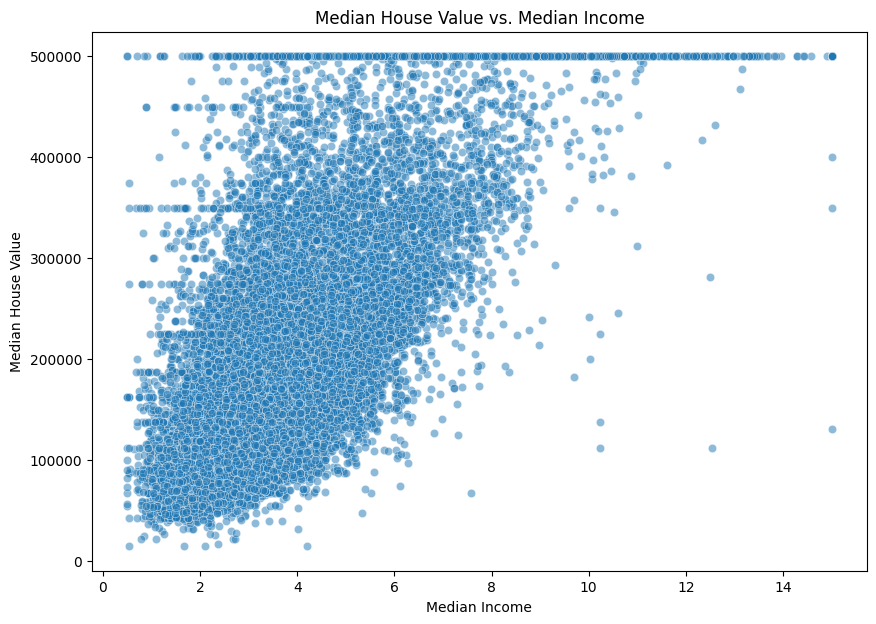

In [214]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5)
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

#### 2. Scatter plot: Median House Value vs Population

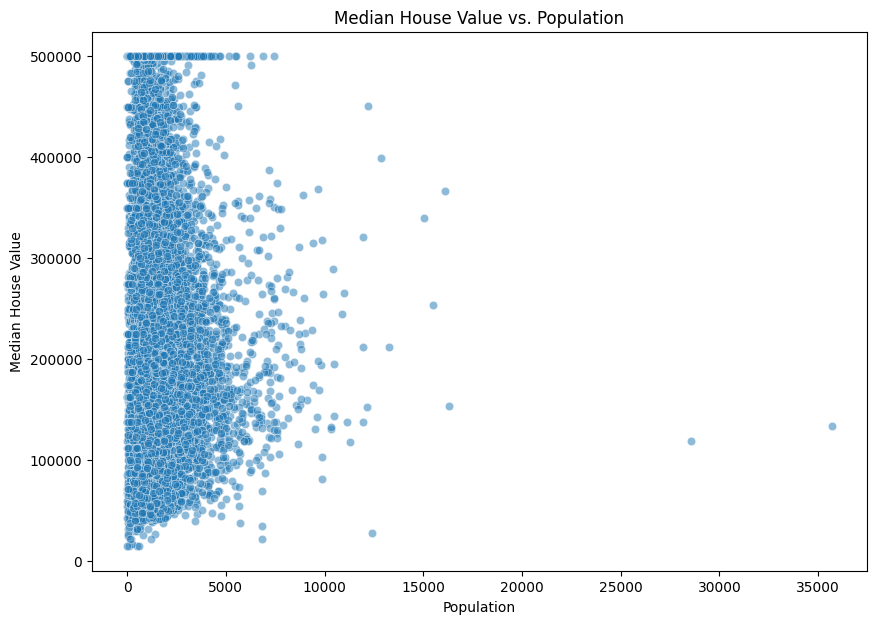

In [215]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='population', y='median_house_value', data=df, alpha=0.5)
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

#### 3. Scatter plot: Median House Value vs Number of Households

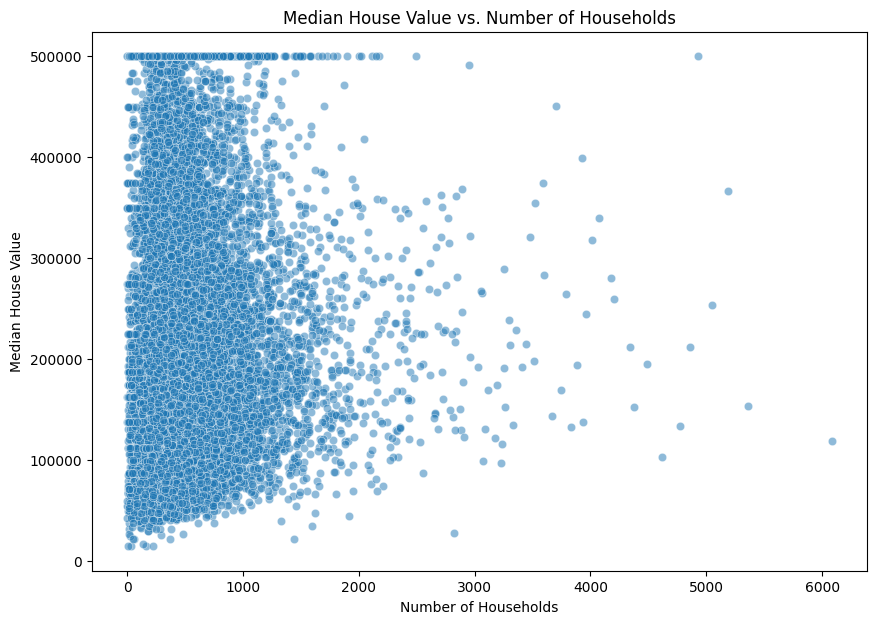

In [216]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='households', y='median_house_value', data=df, alpha=0.5)
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()

**Conclusion:** The visual patterns indicate that median income is expected to yield the most robust linear regression model for forecasting house value, whilst population may have the least impact.

### **Describing the 4 variables used in this lab:**

I have used the following 4 variables:

- **median_house_value**   
    - Median value of houses in each district in USD.
    - Range: $14,999 to $500,001 (capped).
    - This is a targeted variable for the regression models.
    - This is a value we are trying to predict using linear regression. 

- **median_income**
    - Median income of people living in a district in tens of thousands USD.
    - Range: Approximately 0.5 to 15.
    - It shows the strong and positive correlation with house value. 

- **population**
    - It shows the total number of residents per district of california. 
    - Range: About 3 to 35,000 people.
    - It doesnot provide us a clear linear relationship with the median house value. 

- **households**
    - Show case the number of households per district. 
    - Range: About 1 to 6,000 households.
    - It doesnot showcase a positive correlation with the median house value similar to population.
